In [6]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import re
import torch
from sentence_transformers import SentenceTransformer, util

In [7]:
model_name = "Huffon/sentence-klue-roberta-base" 
model = SentenceTransformer(model_name)

df = pd.read_csv(r'C:\Users\USER\source\repos\NLP_Proj\NLP_Proj\embedding.csv',  encoding='utf-8-sig')
df.columns = ["index", "input", "embedding"]
df = model.encode(df['input'].tolist())
#df = df["embedding"].apply(lambda x: re.sub(r'[^\d\.\-\se]', '', x)).apply(lambda x: list(map(float, x.split())))
#df = df.apply(lambda x: np.array(x))
#df = np.stack(df.values)

No sentence-transformers model found with name Huffon/sentence-klue-roberta-base. Creating a new one with MEAN pooling.


In [8]:
def kmeans_SSE(X):
    sse = []
    for k in range(2, 100):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    return sse

def kmeans_Silhouette(X):
    silhouette = []
    for k in range(2, 100):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette.append(score)
    return silhouette

In [11]:
import umap

reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.01,
    n_components=4,
    random_state=43)
df = reducer.fit_transform(df)

C:\Users\USER\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [36]:
from sklearn.decomposition import PCA


# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
pcav = pca.fit_transform(df)

In [12]:
sse = kmeans_SSE(df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_k

In [13]:
silh = kmeans_Silhouette(df)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_k

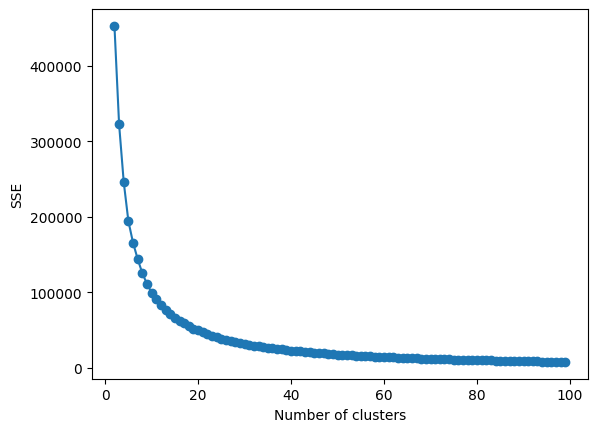

In [14]:
plt.plot(range(2, 100), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

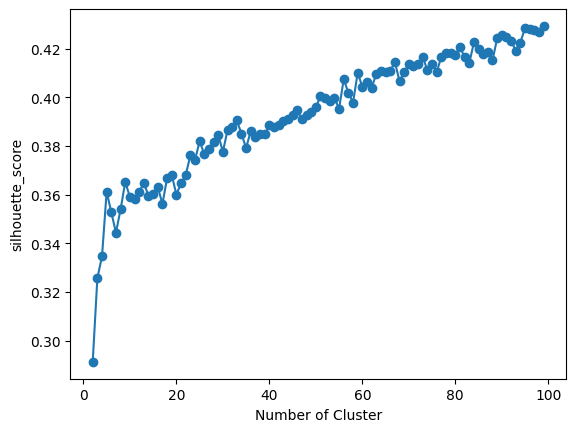

In [15]:
plt.plot(range(2, 100), silh, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('silhouette_score')
plt.show()

In [25]:
#silh = [(i + 2, val) for i , val in enumerate(silh) if i < 15]
#silh = sorted(silh, key=lambda x: x[1], reverse=True)
for s in silh:
    print(s)

(16, (16, 0.36307412))
(15, (15, 0.3600834))
(14, (14, 0.35961378))
(13, (13, 0.3646873))
(12, (12, 0.3611362))
(11, (11, 0.3580365))
(10, (10, 0.35903782))
(9, (9, 0.365198))
(8, (8, 0.35399628))
(7, (7, 0.34439993))
(6, (6, 0.35269004))
(5, (5, 0.36123914))
(4, (4, 0.33467427))
(3, (3, 0.32566914))
(2, (2, 0.29129773))


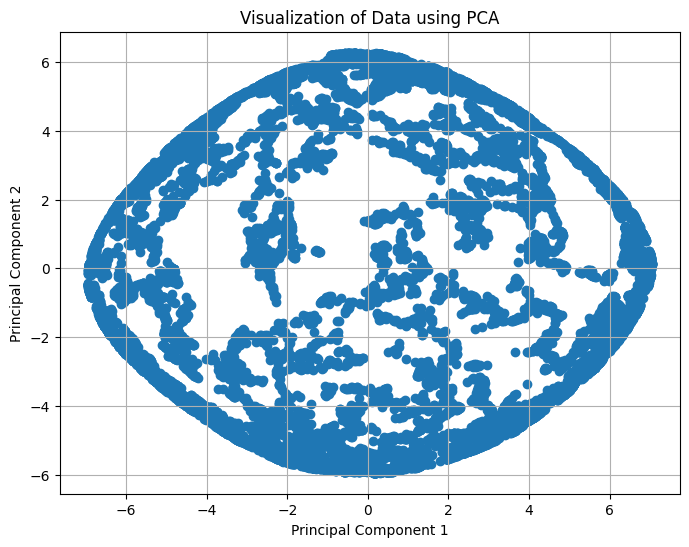

In [17]:
from sklearn.decomposition import PCA

data = df

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Visualization of Data using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 1.3987358   2.2884057   1.0093045   5.7900887 ]
 [ 7.904518    8.95127     6.036821    7.3570642 ]
 [-1.2683473   6.698063    5.977336    3.7144737 ]
 [ 9.227869    2.7738476   5.9402037   3.78448   ]
 [-0.20857239  0.96327114  5.77517     7.5271025 ]
 [ 2.6763241   8.230705    0.4940338   4.2647157 ]
 [ 3.3732045  11.187847    5.6843853   3.411234  ]
 [ 5.3506165  -0.98949957  4.6443706   3.2791815 ]
 [ 7.5151668   4.388546    0.7895725   5.710619  ]]
Cluster Labels:
[2 5 1 ... 1 5 1]


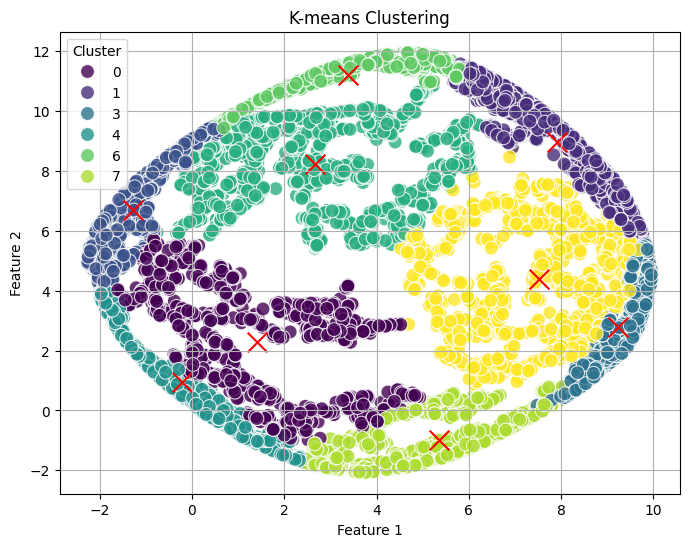

In [26]:
import seaborn as sns

kmeans = KMeans(n_clusters=9)  # 클러스터 개수 설정
kmeans.fit(data)

# 군집 중심 확인
centroids = kmeans.cluster_centers_
print("Cluster Centers:")
print(centroids)

# 군집 할당 확인
labels = kmeans.labels_
print("Cluster Labels:")
print(labels)

# 시각화
plt.figure(figsize=(8, 6))

# 데이터 포인트를 그립니다.
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=100, alpha=0.8)

# 중심점을 그립니다.
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [27]:
print(kmeans.labels_)

[2 5 1 ... 1 5 1]


In [40]:
df3 = pd.read_csv(r'C:\Users\USER\source\repos\NLP_Proj\NLP_Proj\embedding.csv',  encoding='utf-8-sig')
df3.columns = ["index", "input", "embedding"]

ndf = pd.concat([pd.DataFrame(df3['input']),pd.DataFrame(kmeans.labels_)], axis = 1)
ndf.columns = ['sen' , 'lab']
print(ndf)

                                                     sen  lab
0      전정대 3학년 되는 학생인데요전정대 3학년 되는 학생인데요최근 앱개발에 관심이 생겨...    2
1      혹시 컴활에 대해 물어보고 싶은분 물어보세요!혹시 컴활에 대해 물어보고 싶은분 물어...    5
2                                공설입 지원금공설입 지원금언제들어오냐...    1
3      나 너무 배고파 치킨 추천좀!!!나 너무 배고파 치킨 추천좀!!!메뉴 이름도 알려줘!!!    3
4      50대 여성분한테 작별선물 뭐가 좋을까50대 여성분한테 작별선물 뭐가 좋을까같이 일...    1
...                                                  ...  ...
14995                           학교앞디델리학교앞디델리이제부터 밤까지하신대여    6
14996                                 링크드리스트링크드리스트쌉어렵고요~    1
14997    파이썬 질문파이썬 질문x가 정의되어있지않다고 오류가 떠요 ㅠ 어떻게 고쳐야할까요..?    1
14998  산학연계 sw 프로젝트 같은 하실 소융대 학우분들 찾습니다!!산학연계 sw 프로젝트...    5
14999                    임티 원래 2500맞지?임티 원래 2500맞지?맞는거지?    1

[15000 rows x 2 columns]


In [56]:
from konlpy.tag import Okt
import csv

def return_df(x):
    with open(r"C:\Users\USER\Desktop\구글ML 부캠\NLP_Proj\Crap Post Detector_NLP_Proj\corpus\stopword.txt", 'r', encoding = 'utf-8-sig') as f:
         stopwords = [word for sublist in csv.reader(f) for word in sublist]
        
    df_val = {}
    okt = Okt()
    for sen in x:
        word = []
        nouns =  okt.nouns(sen)
        nouns = list(filter(lambda noun : noun not in stopwords and len(noun) > 1, nouns))
        for noun in nouns:
            if noun in word: continue
            if noun in df_val.keys():
                df_val[noun] = df_val[noun] + 1
            else:
                df_val[noun] = 1
            word.append(noun)
    return df_val

In [68]:
def return_tf(x):
    with open(r"C:\Users\USER\Desktop\구글ML 부캠\NLP_Proj\Crap Post Detector_NLP_Proj\corpus\stopword.txt", 'r', encoding = 'utf-8-sig') as f:
         stopwords = [word for sublist in csv.reader(f) for word in sublist]
        
    tf_val = {}
    okt = Okt()
    for sen in x:
        nouns =  okt.nouns(sen)
        nouns = list(filter(lambda noun : noun not in stopwords and len(noun) > 1, nouns))
        for noun in nouns:
            if noun in tf_val.keys():
                tf_val[noun] += 1
            else:
                tf_val[noun] = 1
    return tf_val

In [84]:
def return_tfidf(x, y, length):
    tfidf_val = {}
    for key, val in x.items():
        tfidf_val[key] = val * np.log(length / (y[key] * 10 + 1))
    return tfidf_val

In [57]:
df_cnt = return_df(ndf['sen'])
print(df_cnt)

{'전정': 112, '학년': 463, '학생': 154, '최근': 30, '개발': 35, '관심': 52, '반도체': 16, '관련': 149, '전공': 322, '필요': 27, '부서': 5, '직업': 12, '분야': 14, '생각': 416, '컴활': 40, '대해': 57, '공설': 30, '원금': 18, '치킨': 21, '추천': 313, '메뉴': 19, '이름': 89, '여성': 18, '작별': 1, '선물': 39, '부채': 2, '자취': 94, '간단': 3, '삼겹살': 4, '정식': 4, '행복': 11, '문과': 77, '가치관': 1, '사회': 81, '공부': 407, '운영': 35, '이과': 32, '세상': 25, '발전': 5, '지나': 11, '우리나라': 30, '기술': 29, '인간': 81, '채널': 5, '복면': 1, '소찬휘': 1, '사람': 1043, '머리뼈': 1, '머생': 1, '말좀': 3, '노트북': 122, '고민': 109, '학교': 934, '근처': 125, '배달': 11, '배민': 3, '기요': 2, '크게': 36, '개성': 1, '소개': 20, '가난뱅이': 1, '한부모': 1, '가정': 20, '성적': 129, '증명서': 39, '홈페이지': 75, '대응': 7, '교비': 14, '실화': 53, '선배': 190, '교수': 1554, '민소': 6, '가요': 554, '수업': 730, '스타일': 12, '신지': 3, '얼핏': 1, '듣기': 48, '김민': 5, '느낌': 71, '던데': 49, '족보': 72, '존재': 29, '하나요': 226, '월반': 10, '복학': 105, '예정': 37, '독학': 18, '커버': 14, '광운대': 307, '생체': 2, '정도': 258, '중상': 1, '연애': 25, '등록금': 175, '납부': 35, '명세서': 1, '군대': 108, '

In [58]:
df_cnt = sorted(df_cnt.items(), key=lambda x: x[1], reverse=True)
print(df_cnt)

[('교수', 1554), ('사람', 1043), ('과제', 976), ('강의', 950), ('학교', 934), ('수업', 730), ('학기', 576), ('진짜', 571), ('가요', 554), ('지금', 553), ('그냥', 492), ('시험', 487), ('학년', 463), ('인강', 421), ('과목', 418), ('생각', 416), ('오늘', 409), ('공부', 407), ('실험', 383), ('신청', 377), ('질문', 360), ('건가', 359), ('공지', 343), ('문제', 339), ('대학', 336), ('수강신청', 326), ('전공', 322), ('추천', 313), ('학점', 313), ('광운대', 307), ('이해', 274), ('정도', 258), ('중간고사', 252), ('기간', 250), ('정정', 240), ('제출', 235), ('수학', 230), ('하나요', 226), ('수강', 214), ('쪽지', 206), ('계속', 196), ('교양', 195), ('친구', 194), ('보고', 194), ('신분', 193), ('온라인', 193), ('교재', 193), ('레포트', 193), ('선배', 190), ('대면', 187), ('다시', 186), ('아시', 184), ('물리', 184), ('한번', 181), ('새내기', 178), ('등록금', 175), ('개강', 175), ('영어', 174), ('이제', 174), ('메일', 167), ('원래', 166), ('제발', 160), ('내일', 158), ('대체', 156), ('학생', 154), ('휴학', 150), ('시작', 150), ('에타', 150), ('도서관', 150), ('관련', 149), ('알바', 145), ('갑자기', 143), ('요즘', 142), ('자료', 142), ('기숙사', 141), ('동아리', 1

In [69]:
tf_cnt = return_tf(ndf['sen'])
tf_cnt = sorted(tf_cnt.items(), key=lambda x: x[1], reverse=True)
print(tf_cnt)

[('교수', 2747), ('과제', 1715), ('사람', 1624), ('강의', 1587), ('학교', 1542), ('수업', 1183), ('학기', 1054), ('시험', 871), ('진짜', 828), ('학년', 821), ('실험', 767), ('지금', 763), ('인강', 759), ('과목', 679), ('가요', 672), ('질문', 650), ('학점', 623), ('공부', 617), ('오늘', 612), ('대학', 609), ('신청', 595), ('수강신청', 591), ('전공', 559), ('생각', 559), ('그냥', 552), ('추천', 549), ('광운대', 543), ('공지', 481), ('문제', 473), ('수학', 465), ('이해', 460), ('건가', 409), ('중간고사', 404), ('정정', 400), ('제출', 399), ('기간', 380), ('수강', 372), ('레포트', 354), ('물리', 350), ('교재', 342), ('교양', 328), ('동아리', 325), ('영어', 317), ('대면', 317), ('선배', 316), ('등록금', 312), ('개강', 312), ('온라인', 308), ('정도', 306), ('휴학', 306), ('친구', 304), ('도서관', 302), ('하나요', 293), ('신분', 291), ('알바', 290), ('기숙사', 275), ('공학', 273), ('새내기', 266), ('장학금', 261), ('제발', 244), ('관련', 234), ('메일', 234), ('계속', 232), ('에타', 231), ('쪽지', 231), ('내일', 231), ('한번', 230), ('보고', 229), ('생활', 228), ('다시', 228), ('광운', 228), ('요즘', 227), ('아시', 227), ('자료', 223), ('졸업', 220), ('근

In [85]:
for i in range(0, 9):
    corpus = []
    for index, row in ndf.iterrows():
        if row['lab'] == i: corpus.append(row['sen'])
    tfidf = return_tfidf(return_tf(corpus), return_df(corpus), len(corpus))
    tfidf = sorted(tfidf.items(), key=lambda x: x[1], reverse=True)
    print( str(i) + "th label")
    cnt = 0
    for item in tfidf:
        if cnt >= 20: break
        print(item)
        cnt += 1
    print(" ")

0th label
('실험', 95.69868699482906)
('제출', 94.38022048500738)
('청원', 90.95110370943927)
('질문', 89.83625952992209)
('인강', 88.21604559624467)
('이해', 87.86708242794747)
('알바', 87.2135578398314)
('대면', 82.44318845091368)
('동아리', 81.43318905877388)
('과목', 79.49274363267652)
('학습', 79.06058151650093)
('학년', 78.72865566637742)
('도서관', 78.57546183003565)
('수학', 78.50974914411759)
('공지', 78.3034298244019)
('토익', 76.67023300391433)
('물리', 74.97534448647218)
('생각', 74.88773607227617)
('기숙사', 74.70432959355755)
('온라인', 74.15297141913192)
 
1th label
('오늘', 141.09866859534765)
('추천', 138.97079505706762)
('질문', 138.60298296679764)
('선물', 120.08542761761028)
('교수', 119.23206414464853)
('남자', 118.86849761538453)
('친구', 118.16134854816355)
('페가수스', 106.33126579216422)
('노트북', 105.26925834393421)
('신문사', 103.63073024154407)
('게임', 102.29499389648284)
('생각', 101.41466805290611)
('기숙사', 98.70899577587596)
('족보', 98.47537338042328)
('여자', 95.99647138477862)
('학교', 93.55131186733962)
('아이패드', 91.73004290941